# Housing Data Analysis with Python
First let's install the libraries and do some data exploration.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'E:\\henrique\\ComputerScienceLearning\\Portfolio\\HousingSales\\Nashville Housing Data for Data Cleaning.csv', delimiter=';')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  object 
 2   LandUse          56477 non-null  object 
 3   PropertyAddress  56448 non-null  object 
 4   SaleDate         56477 non-null  object 
 5   SalePrice        56477 non-null  object 
 6   LegalReference   56477 non-null  object 
 7   SoldAsVacant     56477 non-null  object 
 8   OwnerName        25261 non-null  object 
 9   OwnerAddress     26015 non-null  object 
 10  Acreage          26015 non-null  object 
 11  TaxDistrict      26015 non-null  object 
 12  LandValue        26015 non-null  float64
 13  BuildingValue    26015 non-null  float64
 14  TotalValue       26015 non-null  float64
 15  YearBuilt        24163 non-null  float64
 16  Bedrooms         24157 non-null  float64
 17  FullBath    

It's already noticable that many rows have missing data.   
Not all of them will be a problem, however it will require handling this missing data.   
For now, let's note it down, and do some further analysis.

To do:  
- [ ] Missing Data


In [3]:
df.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN","2,3",GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN","3,5",GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN","2,9",GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN","2,6",GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


Although it may seem right, the **SaleDate** column is not well formatted. It is actually a string, that also needs to be fixed.   
The **PropertyAddress** column could also be broken into (Address, City), in order to gain more information.

To do:  
- [ ] Missing Data
- [ ] SaleDate Format
- [ ] PropertyAddress -> Address and City

In [4]:
df['SoldAsVacant'].value_counts()

No     51403
Yes     4623
N        399
Y         52
Name: SoldAsVacant, dtype: int64

After exploring the data for a bit, I found that the column **SoldAsVacant** has two different formats for its inputs, which could be also standardize.  
A further cleaning process that can be done is looking for duplicates, and removing them if any are found.

To do:  
- [ ] Missing Data
- [ ] SaleDate Format
- [ ] PropertyAddress -> Address and City
- [ ] SoldAsVacant standardization
- [ ] Removing duplicates
- [ ] SalePrice formatting

Another problem that can be found is that the column 'SalePrice' is not a int or a float. Pandas has instanced it as an object column.  
That happens because there are some odd values at this column. I. e.:

In [5]:
df[~df['SalePrice'].str.isnumeric()].SalePrice

187          120.000
263        $120.000 
1508       $120.000 
8397       $362.500 
9093         159.900
20447      $195.000 
33741    $1.124.900 
34003      $195.000 
39429        119.000
47752      $178.500 
52352         35.000
53076         35.000
Name: SalePrice, dtype: object

To do:  
- [ ] Missing Data
- [ ] SaleDate Format
- [ ] PropertyAddress -> Address and City
- [ ] SoldAsVacant standardization
- [ ] Removing duplicates
- [ ] SalePrice formatting

## Data cleaning anf formatting
To do:  
- [ ] Missing Data
- [ ] SaleDate Format
- [ ] PropertyAddress -> Address and City
- [ ] SoldAsVacant standardization
- [ ] Removing duplicates
- [ ] SalePrice formatting

### Missing Data
The dataset contains many columns with nulls. One columns that can be fixed is the **PropertyAddress**, which is also one that will be used futurely, so let's fix it.

In [6]:
df[pd.isnull(df['PropertyAddress'])].head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
159,43076,025 07 0 031.00,SINGLE FAMILY,NaN,"January 15, 2016",179900,20160120-0005776,No,"COSTNER, FRED & CAROLYN","410 ROSEHILL CT, GOODLETTSVILLE, TN","0,96",CITY OF GOODLETTSVILLE,30000.0,70000.0,100000.0,1964.0,3.0,1.0,0.0
223,39432,026 01 0 069.00,VACANT RESIDENTIAL LAND,NaN,"October 23, 2015",153000,20151028-0109602,No,"SHACKLEFORD, MICHAEL C., JR.","141 TWO MILE PIKE, GOODLETTSVILLE, TN","0,17",CITY OF GOODLETTSVILLE,21100.0,121600.0,142700.0,2015.0,3.0,2.0,0.0
246,45290,026 05 0 017.00,SINGLE FAMILY,NaN,"March 29, 2016",155000,20160330-0029941,No,"TRIPP, MARVIN S. & DEBORAH YOUNG","208 EAST AVE, GOODLETTSVILLE, TN","0,2",CITY OF GOODLETTSVILLE,21100.0,130200.0,151300.0,2008.0,3.0,2.0,0.0
305,53147,026 06 0A 038.00,RESIDENTIAL CONDO,NaN,"August 25, 2016",144900,20160831-0091567,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,43080,033 06 0 041.00,SINGLE FAMILY,NaN,"January 4, 2016",170000,20160107-0001526,No,"FRANK, ZACHARY & NIKI","1129 CAMPBELL RD, GOODLETTSVILLE, TN","0,24",GENERAL SERVICES DISTRICT,35000.0,110500.0,145500.0,2000.0,3.0,2.0,0.0


The **ParcelID** columns represents an ID for each house. So getting another occurence of the ParcelID on the dataset, might be a solution for finding the house's address.  
Below is a representation of what I mean:   

In [7]:
df[df['ParcelID'] == '025 07 0 031.00']

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
158,38077,025 07 0 031.00,SINGLE FAMILY,"410 ROSEHILL CT, GOODLETTSVILLE","September 25, 2015",120000,20151013-0104052,No,"COSTNER, FRED & CAROLYN","410 ROSEHILL CT, GOODLETTSVILLE, TN","0,96",CITY OF GOODLETTSVILLE,30000.0,70000.0,100000.0,1964.0,3.0,1.0,0.0
159,43076,025 07 0 031.00,SINGLE FAMILY,NaN,"January 15, 2016",179900,20160120-0005776,No,"COSTNER, FRED & CAROLYN","410 ROSEHILL CT, GOODLETTSVILLE, TN","0,96",CITY OF GOODLETTSVILLE,30000.0,70000.0,100000.0,1964.0,3.0,1.0,0.0


Using the following code we can replace all the null values in the **PropertyAddress** column.

In [8]:
# First 
df['PropertyAddress'] = df['PropertyAddress'].fillna(df.groupby('ParcelID')['PropertyAddress'].transform('first'))
pd.isnull(df['PropertyAddress']).any()

False

In [9]:
df[df['ParcelID'] == '025 07 0 031.00']

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
158,38077,025 07 0 031.00,SINGLE FAMILY,"410 ROSEHILL CT, GOODLETTSVILLE","September 25, 2015",120000,20151013-0104052,No,"COSTNER, FRED & CAROLYN","410 ROSEHILL CT, GOODLETTSVILLE, TN","0,96",CITY OF GOODLETTSVILLE,30000.0,70000.0,100000.0,1964.0,3.0,1.0,0.0
159,43076,025 07 0 031.00,SINGLE FAMILY,"410 ROSEHILL CT, GOODLETTSVILLE","January 15, 2016",179900,20160120-0005776,No,"COSTNER, FRED & CAROLYN","410 ROSEHILL CT, GOODLETTSVILLE, TN","0,96",CITY OF GOODLETTSVILLE,30000.0,70000.0,100000.0,1964.0,3.0,1.0,0.0


To do:  
- [x] Missing Data

In [10]:
df.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN","2,3",GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN","3,5",GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN","2,9",GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN","2,6",GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


### SaleDate Format
The columns SaleDate is being considered as as string. After noticing this, which is the hard part of this task, it becomes possible to convert it to a datetime object.

In [11]:
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

In [12]:
df.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN","2,3",GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN","3,5",GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN","2,9",GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN","2,6",GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


To do:  
- [x] SaleDate Format

### PropertyAddress
The houses' addresses composed by the house number, the street name and the city. In order to gain more data, it may be useful to break the column **PropertyAddress** into two diferrent columns **Address** and **City**. 

In [13]:
df[['Address','City']] = df['PropertyAddress'].str.split(',', expand=True)

In [14]:
df[['PropertyAddress','Address','City']].head()

,PropertyAddress,Address,City
0,"1808 FOX CHASE DR, GOODLETTSVILLE",1808 FOX CHASE DR,GOODLETTSVILLE
1,"1832 FOX CHASE DR, GOODLETTSVILLE",1832 FOX CHASE DR,GOODLETTSVILLE
2,"1864 FOX CHASE DR, GOODLETTSVILLE",1864 FOX CHASE DR,GOODLETTSVILLE
3,"1853 FOX CHASE DR, GOODLETTSVILLE",1853 FOX CHASE DR,GOODLETTSVILLE
4,"1829 FOX CHASE DR, GOODLETTSVILLE",1829 FOX CHASE DR,GOODLETTSVILLE


To do:  
- [x] PropertyAddress -> Address and City

### SoldAsVacant
The column **SoldAsVacant** has different types of values, although they all mean either *Yes* or *No*. So it is important to standardize this column

In [15]:
df['SoldAsVacant'].value_counts()

No     51403
Yes     4623
N        399
Y         52
Name: SoldAsVacant, dtype: int64

In [16]:
df.loc[df.SoldAsVacant == 'N', 'SoldAsVacant'] = 'No'
df.loc[df.SoldAsVacant == 'Y', 'SoldAsVacant'] = 'Yes'


In [17]:
df['SoldAsVacant'].value_counts()

No     51802
Yes     4675
Name: SoldAsVacant, dtype: int64

To do:  
- [x] SoldAsVacant standardization

### Removing duplicates
Lastly we can try to find duplicates. Even though all values in the column UniqueID, we can look for duplicates on the combination of the columns [ParcelID, PropertyAddress, SalePrice, SaleDate, LegalReference], this is only with my analysis and understanding of the dataset.

In [18]:
duplicated_rows = df[df.duplicated(subset=['ParcelID', 'PropertyAddress', 'SalePrice', 'SaleDate', 'LegalReference'], keep=False)]
# For an example lets look at one of the samples
duplicated_rows[duplicated_rows['ParcelID'] == '081 02 0 144.00']

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,Address,City
11948,26089,081 02 0 144.00,SINGLE FAMILY,"1728 PECAN ST, NASHVILLE",2015-02-02,57000,20150205-0010843,No,"URBANGATE DEVELOPMENT GROUP, LLC","1728 PECAN ST, NASHVILLE, TN",...,URBAN SERVICES DISTRICT,11000.0,42700.0,54100.0,1968.0,2.0,1.0,0.0,1728 PECAN ST,NASHVILLE
11949,27111,081 02 0 144.00,SINGLE FAMILY,"1728 PECAN ST, NASHVILLE",2015-02-02,57000,20150205-0010843,No,"URBANGATE DEVELOPMENT GROUP, LLC","1728 PECAN ST, NASHVILLE, TN",...,URBAN SERVICES DISTRICT,11000.0,42700.0,54100.0,1968.0,2.0,1.0,0.0,1728 PECAN ST,NASHVILLE


In [19]:
df = df.drop_duplicates(subset=['ParcelID', 'PropertyAddress', 'SalePrice', 'SaleDate', 'LegalReference'])
df[df.duplicated(subset=['ParcelID', 'PropertyAddress', 'SalePrice', 'SaleDate', 'LegalReference'])]

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,Address,City


To do:  
- [x] Removing duplicates

### SalePrice Formatting
As seen above, there are some values badly formatted in the column **SalePrice**. To fix that we can simply remove the strange chars.

In [31]:
# First let's take out all the $ sign
df.SalePrice = df.SalePrice.str.replace("$", "", regex=False)
# Secondly let's take out all the ".", although they may seem correct, they arent helping
df.SalePrice = df.SalePrice.str.replace(".", "", regex=False)
# Lastly let's just remove any blank spaces
df.SalePrice = df.SalePrice.str.replace(" ", "", regex=False)
df.SalePrice = pd.to_numeric(df.SalePrice)

To do:
- [x] SalePrice Formatting 

## Data Exploration
Now that we have the data well sorted we can start exploring the data.

<AxesSubplot:>

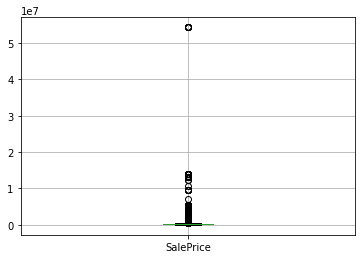

In [50]:
df.boxplot(column=['SalePrice'])